<a href="https://colab.research.google.com/github/Sathvik-CH/Sathvik-project/blob/main/ImageGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Install Required Libraries

In [ ]:
!pip install torch



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install diffusers


#Step 2: Load the Pre-trained *Model*

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

print("GPU Available:", torch.cuda.is_available())

# Only try to print device name if GPU is available
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))

# Load the pre-trained Stable Diffusion model (in float32 for CPU)
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float32,        # changed from float16
    use_auth_token=True,              # if needed for gated model access
    revision="main"
)

pipe = pipe.to("cpu")  # CPU execution


Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


GPU Available: False


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

#Step 3: Generate an Image

In [ ]:
prompt = "A futuristic city skyline at sunset, with flying cars"
image = pipe(prompt).images[0]

# Show the generated image
image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

V2

In [ ]:
from IPython.display import display

prompt = "A futuristic city skyline at sunset, with flying cars"
image = pipe(prompt).images[0]

# Show the generated image in Colab
display(image)


#Step 4: Image save

In [ ]:
# Save the image locally
image.save("futuristic_city_skyline.png")


#futuristic_city_skyline.png

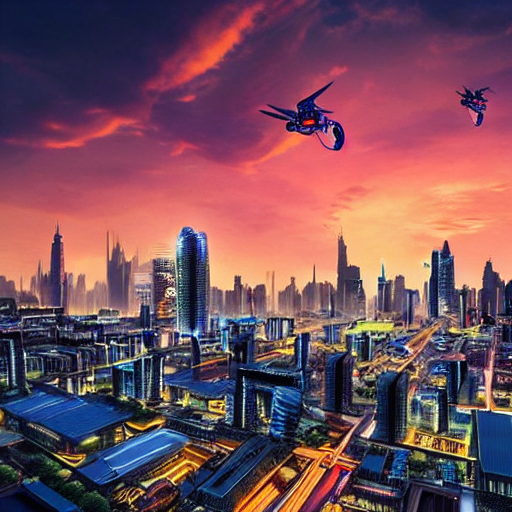

In [ ]:
from PIL import Image as PILImage
from IPython.display import Image, display

# Save the image locally
filename = "futuristic_city_skyline.png"
image.save(filename)

# Display the saved image
display(Image(filename))


#A jellyfish floating through space

  0%|          | 0/50 [00:00<?, ?it/s]

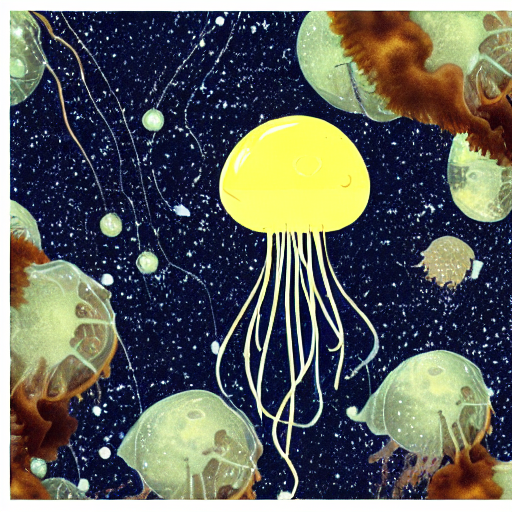

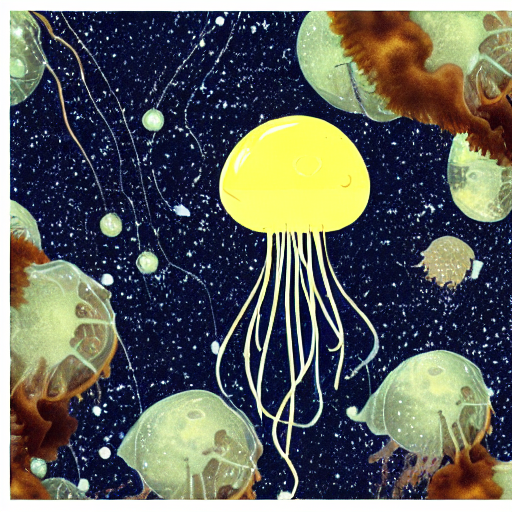

In [ ]:
from IPython.display import display

prompt = "A jellyfish floating through space"
image = pipe(prompt).images[0]

# Show the generated image in Colab
display(image)

# Save the image locally
jellyfish = "jellyfish.png"
image.save(jellyfish)

# Display the saved image
display(Image(jellyfish))

#Dragon

  0%|          | 0/50 [00:00<?, ?it/s]

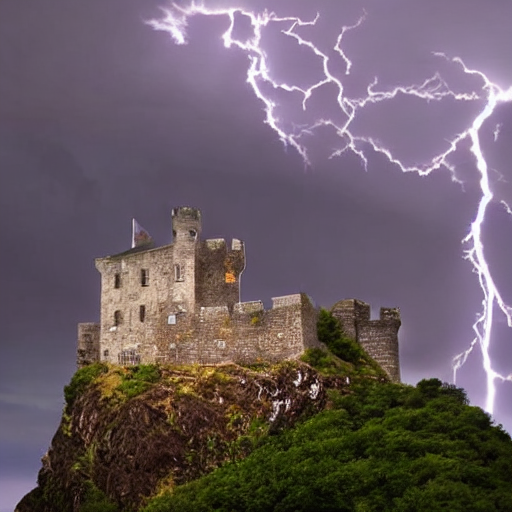

In [ ]:
from IPython.display import display

prompt = "A dragon soaring over a medieval castle during a lightning storm"
image = pipe(prompt).images[0]

# Show the generated image in Colab
display(image)

# Save the image locally
dragon = "dragon.png"
image.save(dragon)



#A peaceful lake with cherry blossom trees during spring

  0%|          | 0/50 [00:00<?, ?it/s]

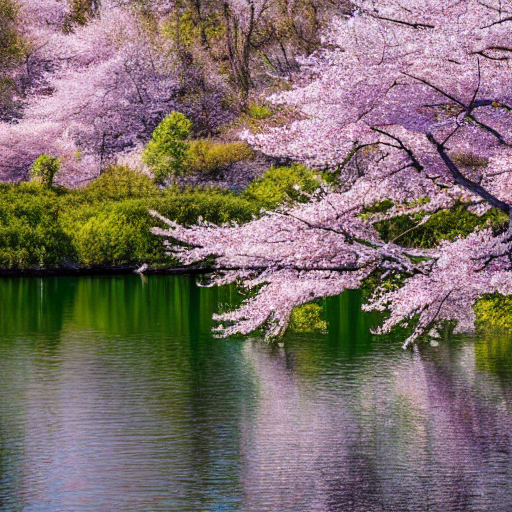

In [ ]:
prompt = "A peaceful lake with cherry blossom trees during spring"
image = pipe(prompt).images[0]

# Show the generated image in Colab
display(image)

# Save the image locally
lake = "lake.png"
image.save(lake)



V2

  0%|          | 0/50 [00:00<?, ?it/s]

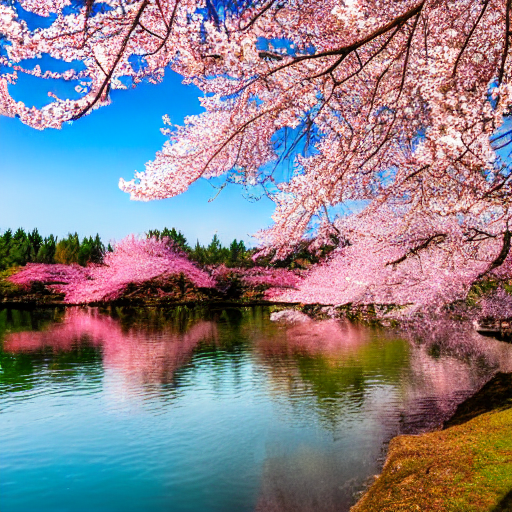

In [ ]:
prompt = "A peaceful lake with cherry blossom trees during spring"
image = pipe(prompt).images[0]

# Show the generated image in Colab
display(image)

# Save the image locally
lake = "lake.png"
image.save(lake)



In [ ]:
import os
os.environ["HF_HUB_TIMEOUT"] = "60"  # Increase timeout from default 10s to 60s


# Why Use T4 GPU?
T4 supports float16 (half precision) and is optimized for inference workloads like Stable Diffusion.

You can use torch.float16 for better performance and memory efficiency.

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Check GPU availability
print("GPU Available:", torch.cuda.is_available())

# Print GPU name if available
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))

# Load the model using float16 for better GPU performance
pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4",
    torch_dtype=torch.float16,            # Efficient half-precision for GPU
    use_auth_token=True,                  # Set this if needed
    revision="main"
)

# Move model to GPU
pipe = pipe.to("cuda")

# Prompt to generate image
prompt = "A fleet of alien spaceships approaching Earth"
image = pipe(prompt).images[0]

# Save and show image
image.save("futuristic_city_skyline.png")
image.show()


GPU Available: False


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

  0%|          | 0/50 [00:00<?, ?it/s]

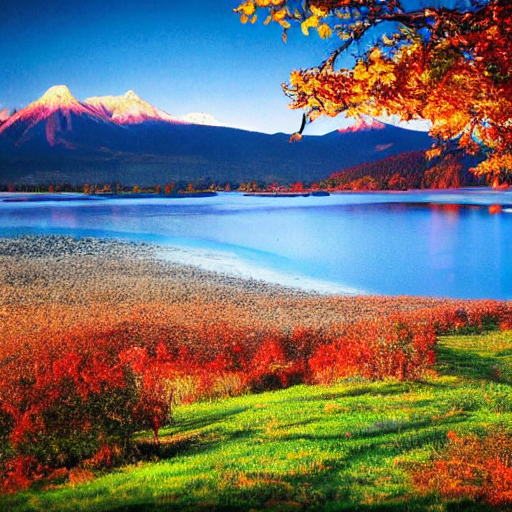

In [ ]:
prompt = "a beautiful scenary"
image = pipe(prompt).images[0]

# Show the generated image in Colab
display(image)

# Save the image locally
Alien = "Alien.png"
image.save(Alien)


  0%|          | 0/50 [00:00<?, ?it/s]

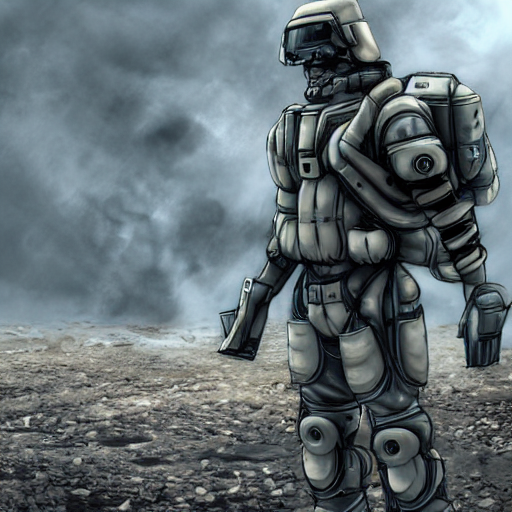

In [ ]:
prompt = "Futuristic soldier in exosuit standing on a battlefield, post-apocalyptic world, high detail"
image = pipe(prompt).images[0]

# Show the generated image in Colab
display(image)

# Save the image locally
Alien = "Alien.png"
image.save(Alien)

  0%|          | 0/50 [00:00<?, ?it/s]

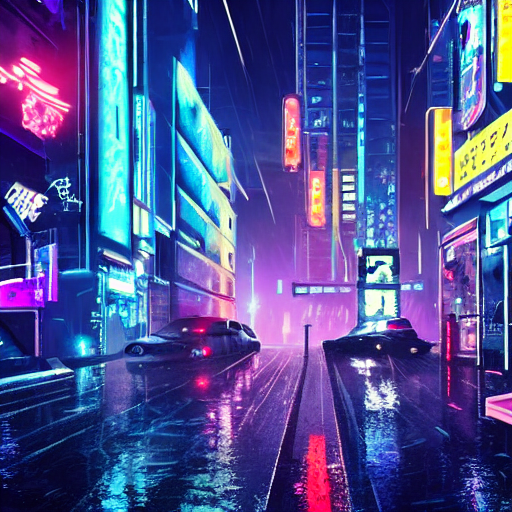

In [ ]:
prompt = "Cyberpunk city at night, neon lights, flying cars, rainy street, Blade Runner style"
image = pipe(prompt).images[0]

# Show the generated image in Colab
display(image)

# Save the image locally
Alien = "Alien.png"
image.save(Alien)

  0%|          | 0/50 [00:00<?, ?it/s]

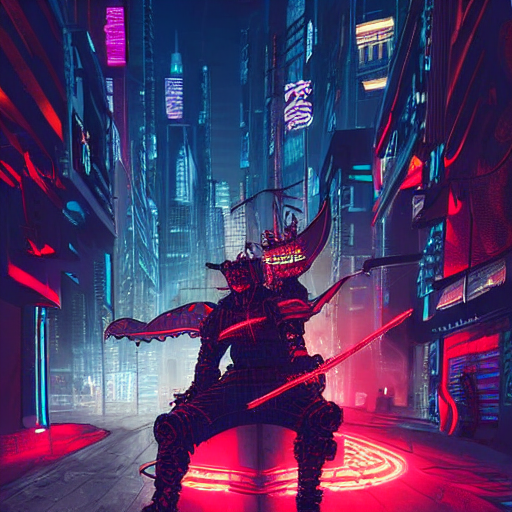

In [ ]:
prompt = "A cyberpunk samurai riding a dragon above a neon-lit city, night, high detail, cinematic"

image = pipe(prompt).images[0]

# Show the generated image in Colab
display(image)

# Save the image locally
Alien = "Alien.png"
image.save(Alien)

In [ ]:
prompt = "give me a image in which a robot with furious eyes will bw holding earth in its hand"

image = pipe(prompt).images[0]

# Show the generated image in Colab
display(image)

# Save the image locally
Alien = "Alien.png"
image.save(Alien)

NameError: name 'pipe' is not defined